### Import Libraries

In [43]:
import pandas as pd

### Load Data

In [44]:
diabetes_data = pd.read_csv('datasets/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
0,10,115,0,0,0,35.3,0.134,29,0
1,2,197,70,45,543,30.5,0.158,53,1
2,4,110,92,0,0,37.6,0.191,30,0
3,10,168,74,0,0,38.0,0.537,34,1
4,10,139,80,0,0,27.1,1.441,57,0


In [3]:
diabetes_data.shape

(533, 9)

### Check for imbalance

In [4]:
diagnosis_count = diabetes_data.diagnosis.value_counts()

Class 1: 487
Class 0: 46
Proportion: 10.59 : 1


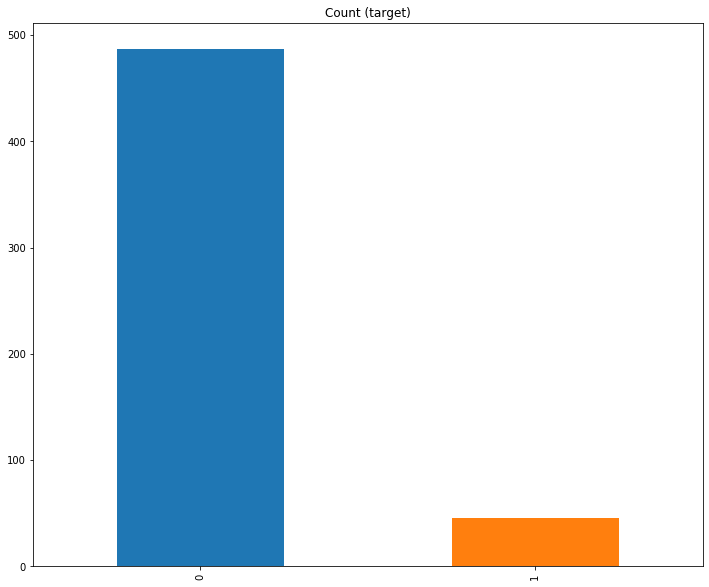

In [7]:
print('Class 1:', diagnosis_count[0])
print('Class 0:', diagnosis_count[1])
print('Proportion:', round(diagnosis_count[0] / diagnosis_count[1], 2), ': 1')

diagnosis_count.plot(kind='bar', title='Count (target)', figsize = (12, 10));

### Separate input features and target

In [8]:
y = diabetes_data.diagnosis
X = diabetes_data.drop('diagnosis', axis=1)

### setting up testing and training sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 27)

In [13]:
X_train.shape, X_test.shape

((399, 8), (134, 8))

## Oversampling using `imblearn`
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
sm = SMOTE(random_state=27, ratio=1.0)

X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [17]:
X_train_sm.shape

(726, 8)

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')

In [21]:
logistic_model.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Checking accuracy

In [22]:
y_pred = logistic_model.predict(X_test)

In [23]:
pd.crosstab (y_pred, y_test)

diagnosis,0,1
row_0,,
0,103,3
1,21,7


In [24]:
from sklearn import metrics

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.8208955223880597

In [26]:
metrics.precision_score(y_test, y_pred)

0.25

In [27]:
metrics.recall_score(y_test, y_pred)

0.7

## Undersampling by `imb` learn

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=27)

In [33]:
X_train.shape, X_test.shape

((399, 8), (134, 8))

In [34]:
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [35]:
X_train_rus.shape

(72, 8)

In [36]:
logistic_model = LogisticRegression(solver='liblinear')

In [37]:
logistic_model.fit(X_train_rus, y_train_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Checking accuracy

In [38]:
y_pred = logistic_model.predict(X_test)

In [39]:
pd.crosstab (y_pred, y_test)

diagnosis,0,1
row_0,,
0,83,5
1,41,5


In [40]:
metrics.accuracy_score(y_test, y_pred)

0.6567164179104478

In [41]:
metrics.precision_score(y_test, y_pred)

0.10869565217391304

In [42]:
metrics.recall_score(y_test, y_pred)

0.5